In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('D:/Learning Stuff/python/data-sciense ---jose-portlieo/ML/logistic regrestion/train.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

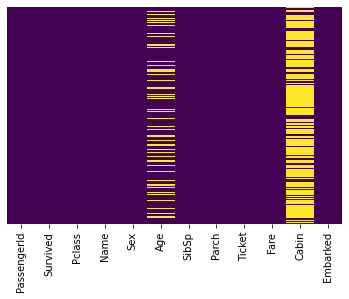

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

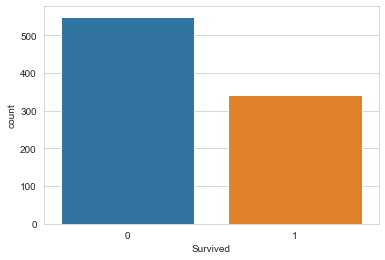

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

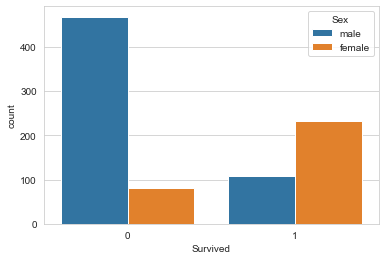

In [9]:
sns.countplot(x='Survived',hue='Sex',data=train)

C:\Users\zxc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

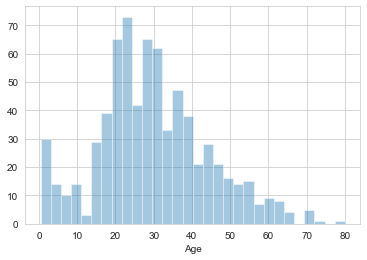

In [18]:
sns.distplot(train['Age'].dropna(),bins=30,kde=False)

<AxesSubplot:>

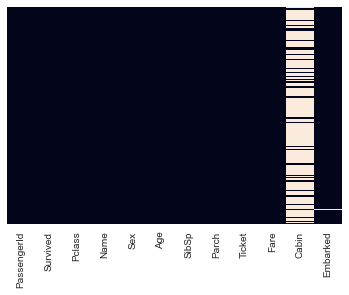

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [28]:
train.drop('Cabin',axis=1,inplace=True)
train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Embarked  
0    False     False  
1    False     False  
2    False     False  
3    False     False  
4    False     False  
..     ...       ...  
886  False     False  
887  False     False  
888  False     False  
889  False     False  
890  False     False  

[891 rows x 11 columns]

In [32]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [34]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      0            113803  53.1000        S     0  0  1  
4      0            373450   8.0500        S     1  0  1

In [37]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [39]:
x= train.iloc[:,1:]
x

Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         3  22.0      1      0   7.2500     1  0  1
1         1  38.0      1      0  71.2833     0  0  0
2         3  26.0      0      0   7.9250     0  0  1
3         1  35.0      1      0  53.1000     0  0  1
4         3  35.0      0      0   8.0500     1  0  1
..      ...   ...    ...    ...      ...   ... .. ..
886       2  27.0      0      0  13.0000     1  0  1
887       1  19.0      0      0  30.0000     0  0  1
888       3  24.0      1      2  23.4500     0  0  1
889       1  26.0      0      0  30.0000     1  0  0
890       3  32.0      0      0   7.7500     1  1  0

[891 rows x 8 columns]

In [41]:
y=train.iloc[:,0:1]
y

Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=101,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [55]:
x_test

Pclass   Age  SibSp  Parch      Fare  male  Q  S
331       1  45.5      0      0   28.5000     1  0  1
700       1  18.0      1      0  227.5250     0  0  0
748       1  19.0      1      0   53.1000     1  0  1
751       3   6.0      0      1   12.4750     1  0  1
481       2  29.0      0      0    0.0000     1  0  1
..      ...   ...    ...    ...       ...   ... .. ..
388       3  24.0      0      0    7.7292     1  1  0
416       2  34.0      1      1   32.5000     0  0  1
407       2   3.0      1      1   18.7500     1  0  1
482       3  50.0      0      0    8.0500     1  0  1
829       1  62.0      0      0   80.0000     0  0  0

[268 rows x 8 columns]

In [46]:
pred = lr.predict(x_test)
pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
cr =classification_report(y_test,pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.78      0.86      0.82       154\n           1       0.78      0.67      0.72       114\n\n    accuracy                           0.78       268\n   macro avg       0.78      0.77      0.77       268\nweighted avg       0.78      0.78      0.78       268\n'

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[133,  21],
       [ 38,  76]], dtype=int64)